In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as sma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
from sklearn.metrics import r2_score, mean_squared_error
filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,precision_score,classification_report,plot_roc_curve,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [3]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [6]:
train.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [7]:
train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [8]:

train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [9]:
train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [10]:
train['User_ID'] = train['User_ID'].astype('object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  object 
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 50.4+ MB


In [12]:
test['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [14]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [15]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [16]:
173638/len(train)

0.3156664266963357

In [17]:
383247/len(train)

0.6967265865311197

In [18]:
train.drop(['Product_Category_2','Product_Category_3'],axis=1, inplace=True)

In [19]:
test.drop(['Product_Category_2','Product_Category_3'],axis=1, inplace=True)

In [20]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     233599 non-null  int64 
 1   Product_ID                  233599 non-null  object
 2   Gender                      233599 non-null  object
 3   Age                         233599 non-null  object
 4   Occupation                  233599 non-null  int64 
 5   City_Category               233599 non-null  object
 6   Stay_In_Current_City_Years  233599 non-null  object
 7   Marital_Status              233599 non-null  int64 
 8   Product_Category_1          233599 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 16.0+ MB


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [23]:
train['Product_Category_1'] = train['Product_Category_1'].astype('object')
train['Occupation'] = train['Occupation'].astype('object')

train['Marital_Status'] = train['Marital_Status'].astype('object')

test['User_ID'] = test['User_ID'].astype('object')
test['Product_Category_1'] = test['Product_Category_1'].astype('object')
test['Occupation'] = test['Occupation'].astype('object')
test['Occupation'] = test['Occupation'].astype('object')
test['Marital_Status'] = test['Marital_Status'].astype('object')


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category_1          550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     233599 non-null  object
 1   Product_ID                  233599 non-null  object
 2   Gender                      233599 non-null  object
 3   Age                         233599 non-null  object
 4   Occupation                  233599 non-null  object
 5   City_Category               233599 non-null  object
 6   Stay_In_Current_City_Years  233599 non-null  object
 7   Marital_Status              233599 non-null  object
 8   Product_Category_1          233599 non-null  object
dtypes: object(9)
memory usage: 16.0+ MB


In [26]:
train['Occupation'].unique()

array([10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14,
       13, 6], dtype=object)

In [27]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['Occupation'] = LE.fit_transform(train['Occupation']) 
train['Gender'] = LE.fit_transform(train['Gender']) 
train['Age'] = LE.fit_transform(train['Age']) 
train['City_Category'] = LE.fit_transform(train['City_Category']) 
train['Stay_In_Current_City_Years'] = LE.fit_transform(train['Stay_In_Current_City_Years']) 
train['Marital_Status'] = LE.fit_transform(train['Marital_Status']) 
train['Product_Category_1'] = LE.fit_transform(train['Product_Category_1']) 
train['Product_ID'] = LE.fit_transform(train['Product_ID']) 

In [29]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,672,0,0,10,0,2,0,2,8370
1,1000001,2376,0,0,10,0,2,0,0,15200
2,1000001,852,0,0,10,0,2,0,11,1422
3,1000001,828,0,0,10,0,2,0,11,1057
4,1000002,2734,1,6,16,2,4,0,7,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,19,368
550064,1006035,3568,0,2,1,2,3,0,19,371
550065,1006036,3568,0,2,15,1,4,1,19,137
550066,1006038,3568,0,6,1,2,2,0,19,365


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  int32 
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int32 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int32 
 8   Product_Category_1          550068 non-null  int32 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(8), int64(1), object(1)
memory usage: 25.2+ MB


<AxesSubplot:>

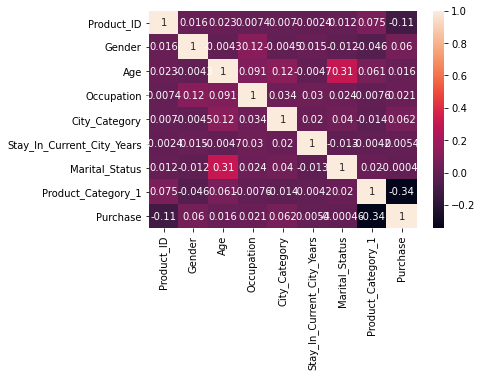

In [31]:
sns.heatmap(train.corr(),annot = True)

<AxesSubplot:xlabel='Purchase'>

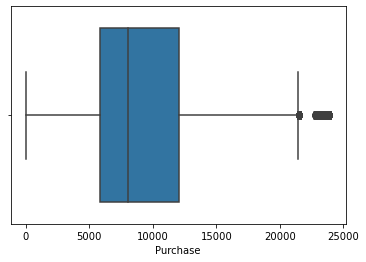

In [32]:
sns.boxplot(train['Purchase'])

In [33]:
Q1 = train['Purchase'].quantile(0.25)
Q3 = train['Purchase'].quantile(0.75)

IQR = Q3-Q1

ll = Q1-2*IQR
ul = Q3+2*IQR

In [34]:
train = train[(train['Purchase']>ll) & (train['Purchase']<ul)]
train.shape

(550068, 10)

## Model Buiding

In [35]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
train.head()
len(train['Product_ID'].unique())

3631

In [36]:
X = train.drop(['Purchase','User_ID'],axis=1)
y = train['Purchase']



In [116]:
Xc = sma.add_constant(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Xc,y,test_size=0.3,random_state=10)

In [117]:
model = sma.OLS(y,Xc).fit()

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                 2.632e+04
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:25:48   Log-Likelihood:            -5.4312e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550064   BIC:                         1.086e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.176e+04     15.972    736.066      0.000    1.17e+04    1.18e+04
Product_ID            -0.4183      0.006    -66.659      0.000      -0.431      -0.406
Occupation            14.5465      0.971     14.980      0.000      12.643      16.450
Product_Category_1  -430.3856      1.614   -266.729      0.000    -433.548    -427.223
==============================================================================
Omnibus:                    59683.370   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82849.835
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       3.776   Cond. No.                     5.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

KeyboardInterrupt: 

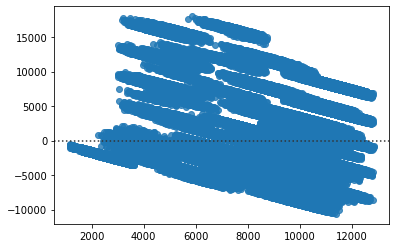

In [145]:
fitted =model.fittedvalues # predicted values
resid = model.resid        # actual - predicted

sns.residplot(fitted,resid,lowess =True, line_kws={'color': 'red', 'lw': 2, 'alpha': 0.7}, )

In [41]:
# model linearity:: Rainbow Test
# Ho: Data is Linear
# H1: Data is not Linear

sma.stats.diagnostic.linear_rainbow(model)

#We can infer that since pvalue>0.05, we failed to reject H0 meaning Model follows Linearity

(0.991877157380131, 0.9837673561329771)

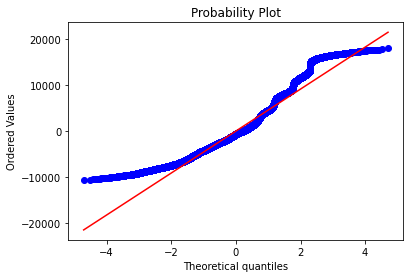

In [42]:
from scipy import stats
from scipy.stats import probplot
probplot(model.resid,plot=plt)
plt.show()


In [43]:
# model Normality:: Shapiro Test
# Ho: Data is Normal
# H1: Data is not Normal

teststats, pvalue = stats.shapiro(model.resid)

print('Test Statistics:', teststats)
print('P-Value:', pvalue)

#If dataset > 5000, we must use or infer test-statistic as an indicator for checking normality
#Inference: Since our data > 5000 hence using teststats which is > 0.05, hence our data is normal.

Test Statistics: 0.9535543918609619
P-Value: 0.0


## Ranodom Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
#Initialization and Fitting
rfr = RandomForestRegressor(n_estimators=200, random_state=10)
rfr_model = rfr.fit(X_train, y_train)
ypred_rfr = rfr_model.predict(X_test)
rfr_r2 = r2_score(y_test, ypred_rfr)

In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165021 entries, 413090 to 289492
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   const                       165021 non-null  float64
 1   Product_ID                  165021 non-null  int32  
 2   Gender                      165021 non-null  int32  
 3   Age                         165021 non-null  int32  
 4   Occupation                  165021 non-null  int32  
 5   City_Category               165021 non-null  int32  
 6   Stay_In_Current_City_Years  165021 non-null  int32  
 7   Marital_Status              165021 non-null  int32  
 8   Product_Category_1          165021 non-null  int32  
dtypes: float64(1), int32(8)
memory usage: 7.6 MB


In [46]:
rfr_r2

0.6709239601159247

In [105]:
importances = list(rfr.feature_importances_)

In [106]:
importances

[0.125424272911753, 0.053949791303063155, 0.8206259357851838]

In [107]:
X_train.columns

Index(['Product_ID', 'Occupation', 'Product_Category_1'], dtype='object')

In [108]:
feature_list = X_train.columns

In [109]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Product_Category_1   Importance: 0.82
Variable: Product_ID           Importance: 0.13
Variable: Occupation           Importance: 0.05


[None, None, None]

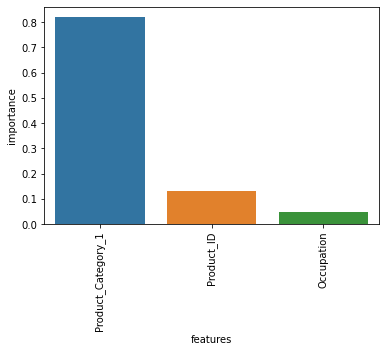

In [110]:
a = pd.DataFrame(feature_importances)
a.columns = ['features','importance']
sns.barplot(a['features'],a['importance'])
plt.xticks(rotation=90)
plt.show()

In [118]:
X = train.drop(['Purchase','User_ID','Gender','Marital_Status','City_Category','Age','Stay_In_Current_City_Years'],axis=1)
y = train['Purchase'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [37]:
from sklearn.ensemble import RandomForestRegressor
#Initialization and Fitting
rfr = RandomForestRegressor(n_estimators=200, random_state=10)
rfr_model = rfr.fit(X_train, y_train)
ypred_rfr = rfr_model.predict(X_test)
rfr_r2 = r2_score(y_test, ypred_rfr)

In [38]:
rfr_r2

0.6931636630766513

In [116]:
ypred_rfr

array([ 8713.51324491,  4494.38166655,  7340.76790224, ...,
        8688.72912506,  6043.40026987, 10341.13424637])

In [463]:
rfr_r2

0.6709239601159247

In [249]:
rfr_r2

0.6697273312462846

In [113]:
rf_rmse = np.sqrt(mean_squared_error(y_test, ypred_rfr))
rf_rmse

2781.6702869202445

In [114]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
test['Occupation'] = LE.fit_transform(test['Occupation']) 
test['Gender'] = LE.fit_transform(test['Gender']) 
test['Age'] = LE.fit_transform(test['Age']) 
test['City_Category'] = LE.fit_transform(test['City_Category']) 
test['Stay_In_Current_City_Years'] = LE.fit_transform(test['Stay_In_Current_City_Years']) 
test['Marital_Status'] = LE.fit_transform(test['Marital_Status']) 
test['Product_Category_1'] = LE.fit_transform(test['Product_Category_1']) 
test['Product_ID'] = LE.fit_transform(test['Product_ID']) 

In [ ]:
a = test.drop()

In [117]:
ypred_rfr_1 = rfr_model.predict(test)
ypred_rfr_1

ValueError: X has 9 features, but DecisionTreeRegressor is expecting 3 features as input.

In [233]:
b = pd.DataFrame(ypred_rfr_1)
b

,0
0,7282.951667
1,10136.316667
2,6011.297667
3,2197.450000
4,2517.971667
...,...
233594,8326.470000
233595,5722.620000
233596,12923.767500
233597,20265.660000


In [234]:
c = pd.read_csv('test.csv')

In [235]:
final = pd.concat([b,c],axis=1)

In [237]:
predicted_df = final.drop(['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1'],axis=1)

In [240]:
predicted_df.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [244]:
predicted_df.rename(columns={0:'Purchase'},inplace=True)

In [245]:
predicted_df.to_csv('black_friday.csv',index=False)


In [246]:
predicted_df

,Purchase,User_ID,Product_ID
0,7282.951667,1000004,P00128942
1,10136.316667,1000009,P00113442
2,6011.297667,1000010,P00288442
3,2197.450000,1000010,P00145342
4,2517.971667,1000011,P00053842
...,...,...,...
233594,8326.470000,1006036,P00118942
233595,5722.620000,1006036,P00254642
233596,12923.767500,1006036,P00031842
233597,20265.660000,1006037,P00124742


In [232]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,672,0,0,10,0,2,0,2,8370
1,1000001,2376,0,0,10,0,2,0,0,15200
2,1000001,852,0,0,10,0,2,0,11,1422
3,1000001,828,0,0,10,0,2,0,11,1057
4,1000002,2734,1,6,16,2,4,0,7,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,19,368
550064,1006035,3568,0,2,1,2,3,0,19,371
550065,1006036,3568,0,2,15,1,4,1,19,137
550066,1006038,3568,0,6,1,2,2,0,19,365


## Linear regression

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
ypred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test,ypred_lr)

In [55]:
lr_r2

0.13521478468563297

## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200,max_depth=10)


In [41]:
gbr_model = gbr.fit(X_train, y_train)

In [42]:
y_pred_gbr = gbr_model.predict(X_test)

In [43]:
gbr_r2 = r2_score(y_test, y_pred_gbr)

In [44]:
gbr_r2

0.7120427228117421

In [112]:
y_pred_gbr = gbr_model.predict(test)
y_pred_gbr

ValueError: X has 9 features, but DecisionTreeRegressor is expecting 3 features as input.

In [109]:
b= pd.DataFrame(y_pred_gbr)

In [110]:
c = pd.read_csv('test.csv')

In [1]:
y_test

NameError: name 'y_test' is not defined

In [111]:
final = pd.concat([,c],axis=1)

In [112]:
predicted_df = final.drop(['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1'],axis=1)

In [113]:
predicted_df.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [114]:
predicted_df.rename(columns={0:'Purchase'},inplace=True)

In [115]:
predicted_df.to_csv('black_friday.csv',index=False)


In [313]:
from sklearn.model_selection import GridSearchCV


In [318]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [8,10,12,14]
                 }

In [321]:
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 10,n_jobs=-1)


In [322]:
grid_GBR.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_GBR.best_params_

## Ada Boost

In [258]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=100,
                        random_state=10)

In [259]:
abr_model = abr.fit(X_train, y_train)
y_pred_abr = abr_model.predict(X_test)
abr_r2 = r2_score(y_test, y_pred_abr)

In [260]:
abr_r2

0.48528319613282367

## Decision Tree Model

In [119]:
#Initializing the regressor 
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion= 'mse', min_samples_leaf=50
                            ,min_samples_split=30,splitter='best',
                            random_state= 10)

In [120]:
dtr_model = dtr.fit(X_train, y_train)

In [121]:
ypred_dtr = dtr_model.predict(X_test)

In [122]:
dtr_r2 = r2_score(y_test, ypred_dtr)

In [123]:
dtr_r2

0.7113269063056931

In [124]:
ypred_dtr = dtr_model.predict(test.drop(''))

ValueError: X has 9 features, but DecisionTreeRegressor is expecting 3 features as input.